In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_excel('family_financial_and_transactions_data.xlsx')

In [4]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


### Family level:


In [5]:
family_spending = df.groupby('Family ID')['Amount'].sum()
print("Total Spending by Family:\n")
family_spending

Total Spending by Family:



Family ID
FAM001    23188.90
FAM002    22309.71
FAM003    11220.34
FAM004    23483.10
FAM005    40246.21
            ...   
FAM196    31433.34
FAM197     4032.82
FAM198    19378.59
FAM199    31009.65
FAM200    24887.93
Name: Amount, Length: 200, dtype: float64

In [6]:
family_members = df.groupby('Family ID')['Member ID'].nunique()
average_spending_per_member = family_spending / family_members
print("\nAverage Spending per Member by Family:\n")
average_spending_per_member


Average Spending per Member by Family:



Family ID
FAM001    5797.225000
FAM002    4461.942000
FAM003    5610.170000
FAM004    4696.620000
FAM005    5749.458571
             ...     
FAM196    4490.477143
FAM197    2016.410000
FAM198    4844.647500
FAM199    4429.950000
FAM200    4147.988333
Length: 200, dtype: float64

### Member Level:

In [7]:
member_spending = df.groupby('Member ID')['Amount'].sum()
print("\nTotal Spending by Member:\n")
member_spending


Total Spending by Member:



Member ID
FAM001_Member1    6521.20
FAM001_Member2    7084.83
FAM001_Member3    2119.41
FAM001_Member4    7463.46
FAM002_Member1    3082.90
                   ...   
FAM200_Member2    2103.85
FAM200_Member3    4671.33
FAM200_Member4    3739.52
FAM200_Member5    5408.28
FAM200_Member6    1837.73
Name: Amount, Length: 926, dtype: float64

In [8]:
member_spending_by_category = df.groupby(['Member ID', 'Category'])['Amount'].sum()
print("\nSpending by Category for Each Member:\n")
member_spending_by_category


Spending by Category for Each Member:



Member ID       Category     
FAM001_Member1  Education         656.60
                Entertainment    1637.63
                Food              530.46
                Groceries         531.89
                Healthcare       1086.53
                                  ...   
FAM200_Member6  Education         325.58
                Entertainment     475.34
                Food              190.30
                Groceries          79.99
                Travel            766.52
Name: Amount, Length: 5669, dtype: float64

## Correlation

<AxesSubplot:>

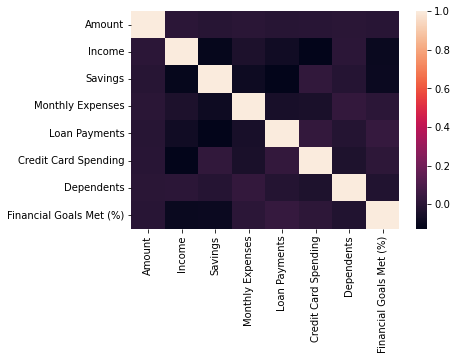

In [9]:
sns.heatmap(df.corr())

In [10]:
family_income = df.groupby('Family ID')['Income'].sum()
family_expenses = df.groupby('Family ID')['Monthly Expenses'].sum()
correlation_income_expenses = family_income.corr(family_expenses)

print(f"\nCorrelation between Income and Monthly Expenses: {correlation_income_expenses}")


Correlation between Income and Monthly Expenses: 0.4835187487729653


In [11]:
family_savings = df.groupby('Family ID')['Savings'].sum()
family_spending = df.groupby('Family ID')['Credit Card Spending'].sum()
correlation_savings_spending = family_savings.corr(family_spending)

print(f"\nCorrelation between Savings and Credit Card Spending Habits: {correlation_savings_spending}")


Correlation between Savings and Credit Card Spending Habits: 0.3514669492732694


In [12]:
df.isna().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [13]:
import numpy as np

def remove_outlier(data):
    factor=1.5
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    return data[(data >= lower_bound) & (data <= upper_bound)] 

In [14]:
columns_to_clean = ['Amount', 'Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)']

for column in columns_to_clean:
    df[column] = remove_outlier(df[column])

df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


### Factor	Weight	Scoring 
- Savings-to-Income Ratio --->	20 
- Monthly Expenses as a % of Income --->	20	
- Loan Payments as a % of Income--->	15
- Credit Card Spending Trends	--->15
- Spending Category Distribution--->	15
- Financial Goals Met (%)--->	15

### Scoring Logic for Each Factor:

#### Savings-to-Income Ratio:
- If the ratio is above 20%, assign a score of 20.
- For every 1% decrease, deduct 1 point.
#### Monthly Expenses as a % of Income:
- If the percentage is below 30%, assign a score of 20.
- For every 1% increase, deduct 1 point.
#### Loan Payments as a % of Income:
- If the percentage is below 20%, assign a score of 15.
- For every 1% increase, deduct 1 point.
#### Credit Card Spending Trends:
- Analyze the past 6 months of spending.
- Consistent spending with no significant spikes: 15 points.
- Moderate increase: 10 points.
- Significant increase: 5 points.
- Declining trend: 0 points.
#### Spending Category Distribution:
- Assign weights to different categories (e.g., groceries, housing, transportation, entertainment).
- Calculate a weighted average based on the proportion of spending in each category.
#### Financial Goals Met (%):
- Directly assign the percentage as the score.

In [15]:
df1=df.copy()

In [16]:
df.Category.unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [17]:

def calculate_financial_health_score(df):
    df['SavingsToIncomeRatio'] = df['Savings'] / df['Income']

    df['MonthlyExpenseRatio'] = df['Monthly Expenses'] / df['Income']

    df['LoanPaymentRatio'] = df['Loan Payments'] / df['Income']
    
    df['Spending Category'] = df['Credit Card Spending'] / df['Income']
    
    df['FinancialGoalsMetScore'] = df['Financial Goals Met (%)'] /100

    weights = {
        'SavingsToIncomeRatio': 20,
        'MonthlyExpenseRatio': 20,
        'LoanPaymentRatio': 15,
        'CreditCardSpendingTrend': 15,
        'SpendingCategoryDistribution': 15,
        'FinancialGoalsMetScore': 15
    }

    df['WeightedScore'] = (
        df['SavingsToIncomeRatio'] * weights['SavingsToIncomeRatio'] +
        (1 - df['MonthlyExpenseRatio']) * weights['MonthlyExpenseRatio'] +
        (1 - df['LoanPaymentRatio']) * weights['LoanPaymentRatio'] +
        df['Spending Category'] * weights['SpendingCategoryDistribution'] +
        df['FinancialGoalsMetScore'] * weights['FinancialGoalsMetScore']
    )

    return df['WeightedScore']
if __name__ == '__main__':
    df1['FinancialHealthScore'] = calculate_financial_health_score(df1)

## Visualization

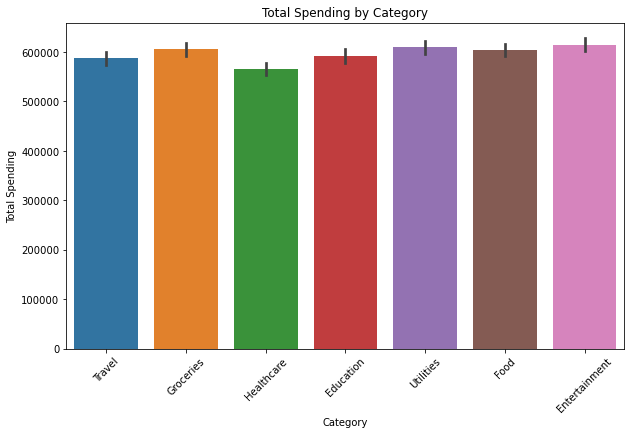

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Amount', data=df, estimator=sum)
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

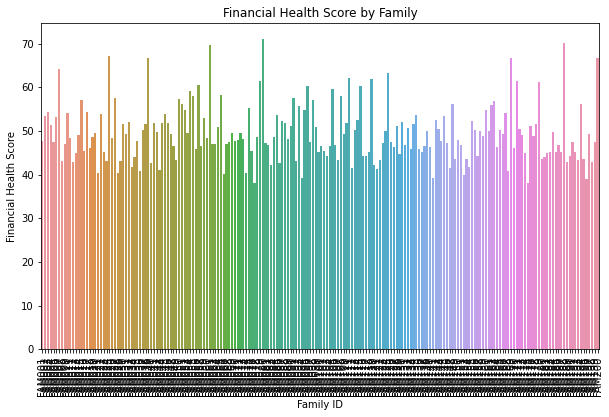

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Family ID', y='FinancialHealthScore', data=df1)
plt.title('Financial Health Score by Family')
plt.xlabel('Family ID')
plt.ylabel('Financial Health Score')
plt.xticks(rotation=90)
plt.show()

In [20]:
df1.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),SavingsToIncomeRatio,MonthlyExpenseRatio,LoanPaymentRatio,Spending Category,FinancialGoalsMetScore,WeightedScore,FinancialHealthScore
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999,0.68,47.810623,47.810623
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999,0.68,47.810623,47.810623
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999,0.68,47.810623,47.810623
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999,0.68,47.810623,47.810623
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999,0.68,47.810623,47.810623


In [21]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [22]:
X=df1[['Category','Amount','Income','Savings','Monthly Expenses','Loan Payments','Credit Card Spending','Dependents']]
y=df1.FinancialHealthScore

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
ct = ColumnTransformer(transformers=[('Category', OneHotEncoder(), [0])],remainder='passthrough') #sparse=False
X_ct=ct.fit_transform(X)
s = StandardScaler() # with_mean=False
X_s = s.fit_transform(X_ct)

In [31]:
import xgboost as xgb 
model = xgb.XGBRegressor()
model.fit(X_s, y)
model.score(X_s, y)

0.9999999973562994

In [32]:
import pickle
with open('family.pickle','wb') as f:
    pickle.dump(model,f)

In [24]:
# This is for my input system which will input to my model

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
new_row = {'Category': c,'Amount': a,'Income':i,'Savings':s,'Monthly Expenses': me,'Loan Payments': lp,'Credit Card Spending': ccs,'Dependents':d}
input_df = pd.concat([X, pd.DataFrame([new_row])], ignore_index=True)
input_df=input_df.values
preprocessor = ColumnTransformer(transformers=[('Category', OneHotEncoder(), [0])],remainder='passthrough')
input_df_pre = preprocessor.fit_transform(input_df)
scaler1 = StandardScaler()
new_scaled = scaler1.fit_transform(input_df_pre)
last_row_transformed = input_df_pre[-1].reshape(1, -1)



In [33]:
import json
columns = {
    'category_columns' : [col for col in df.Category.unique()]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [35]:
X.to_csv('X.csv', index=False)